In [3]:
for i in os.listdir("./xml"):
    print(i)

Badges.xml
Comments.xml
PostHistory.xml
PostLinks.xml
Posts.xml
Tags.xml
Users.xml
Votes.xml


In [7]:
import pandas as pd
import xml.etree.ElementTree as ET
import re
import os

for i in os.listdir("./xml"):
     if i[-3] == 'x':
        rows = []
        tree = ET.parse(f"./xml/{i}").getroot()

        for row in tree.findall('row'):
            rows.append(row.attrib)

        df = pd.DataFrame(rows)

        df.to_csv(f"./Csv/{i}.csv")

In [35]:
import re
import pandas as pd

posts = pd.read_csv('./Csv/Posts.xml.csv')

posts['Body'] = posts['Body'].fillna('')

for i in range(len(posts)):
    posts.loc[i, 'Body'] = re.sub('<.*?>', '', posts.loc[i, 'Body'])

In [37]:
import pandas as pd

questions = posts[posts['PostTypeId'] == 1]
answers = posts[posts['PostTypeId'] == 2]

accepted_answers = questions.merge(answers, left_on='AcceptedAnswerId', right_on='Id', suffixes=('Q', 'A'))

accepted_answers[['BodyQ', 'BodyA']].to_csv('./CleanedQA.csv')

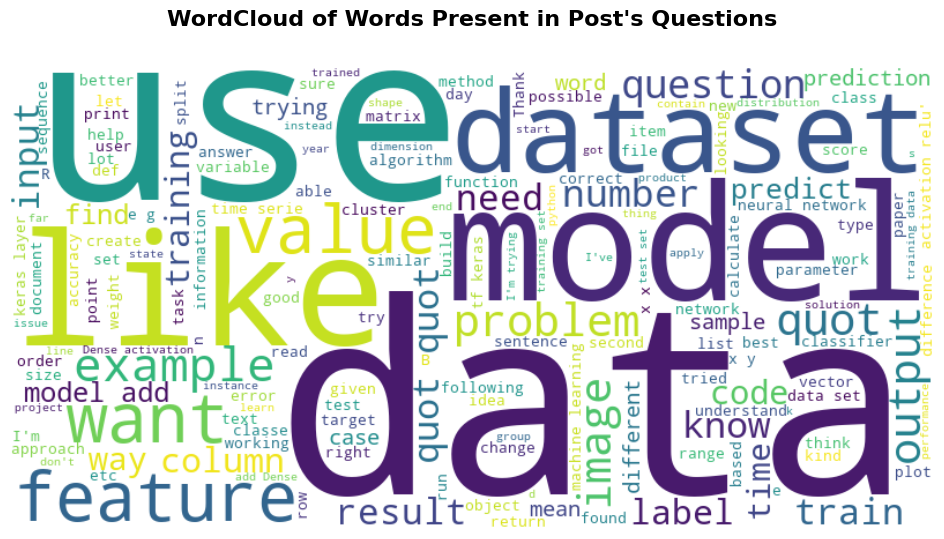

In [29]:
import matplotlib.pyplot as plt
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud


wordsToRemove = spacy.lang.en.stop_words.STOP_WORDS
wordcloud = WordCloud(min_font_size=8, width=800, height=400, background_color='white',stopwords=wordsToRemove).generate(' '.join(questions['Body']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Words Present in Post's Questions", fontsize=16, fontweight='bold', pad=30)
plt.show()

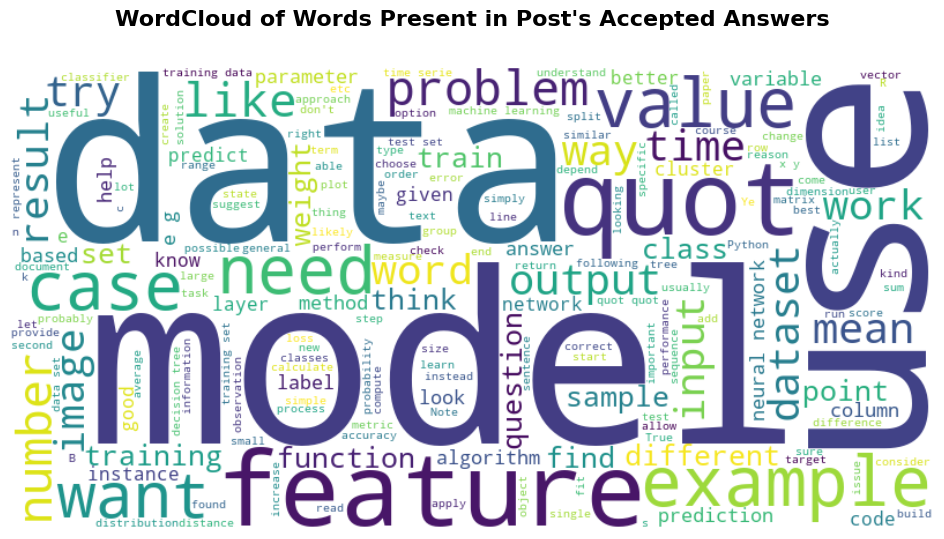

In [30]:
wordsToRemove = spacy.lang.en.stop_words.STOP_WORDS
wordcloud = WordCloud(min_font_size=8, width=800, height=400, background_color='white',stopwords=wordsToRemove).generate(' '.join(answers['Body']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Words Present in Post's Accepted Answers", fontsize=16, fontweight='bold', pad=30)
plt.show()